In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

# ***Data Understanding***
* **survival** - Survival	0 = No, 1 = Yes  (**Target**)
* **pclass** -   Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
* **sex**-       Sex
* **Age** -      Age in years
* **sibsp**-# of siblings / spouses aboard the Titanic
* **parch**-# of parents / children aboard the Titanic
* **ticket**-Ticket number	
* **fare**-Passenger fare
* **cabin**-Cabin number
* **embarked**-Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [2]:
df=pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()
# age , cabin and embarked have null value

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
(df["Cabin"].isnull().sum()/891)*100
# 77 % of data is missing so dropping the cabin column

77.10437710437711

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [9]:
df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [10]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [11]:
df["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [12]:
df["SibSp"].value_counts()	

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [13]:
df["Parch"].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [14]:
df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [15]:
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [16]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [17]:
df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [18]:
# Create a new family size column based on 'sibsp' and 'parch column
df['Family_size']=df['SibSp']+df['Parch']

In [19]:
df['Family_size'].value_counts()

Family_size
0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: count, dtype: int64

In [20]:
df['IsAlone'] = (df['Family_size'] == 0).astype(int)
#1- person is alone
#0- person have a family

In [21]:
df['IsAlone'].value_counts()

IsAlone
1    537
0    354
Name: count, dtype: int64

In [22]:
df.drop(columns=["PassengerId","Name","Ticket","Cabin",'SibSp','Parch'],inplace=True)
# irrelevant fetaure and non informative

In [23]:
df["Age"]=df["Age"].fillna(df["Age"].mean())
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode()[0])

In [24]:
df

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_size,IsAlone
0,0,3,male,22.000000,7.2500,S,1,0
1,1,1,female,38.000000,71.2833,C,1,0
2,1,3,female,26.000000,7.9250,S,0,1
3,1,1,female,35.000000,53.1000,S,1,0
4,0,3,male,35.000000,8.0500,S,0,1
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,13.0000,S,0,1
887,1,1,female,19.000000,30.0000,S,0,1
888,0,3,female,29.699118,23.4500,S,3,0
889,1,1,male,26.000000,30.0000,C,0,1


In [25]:
df.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Family_size    0
IsAlone        0
dtype: int64

In [26]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Family_size',
       'IsAlone'],
      dtype='object')

In [27]:
cat=[ 'Pclass', 'Sex','Embarked', 'Family_size',
       'IsAlone']
cont=["Age","Fare"]
target=['Survived']

In [28]:
# Cross-tabulation for each categorical variable
for i in cat:
    print(f"Cross-tabulation for {i}:")
    crosstab=pd.crosstab(df[i], df["Survived"], margins=True)
    print(crosstab)
    print("\n")

Cross-tabulation for Pclass:
Survived    0    1  All
Pclass                 
1          80  136  216
2          97   87  184
3         372  119  491
All       549  342  891


Cross-tabulation for Sex:
Survived    0    1  All
Sex                    
female     81  233  314
male      468  109  577
All       549  342  891


Cross-tabulation for Embarked:
Survived    0    1  All
Embarked               
C          75   93  168
Q          47   30   77
S         427  219  646
All       549  342  891


Cross-tabulation for Family_size:
Survived       0    1  All
Family_size               
0            374  163  537
1             72   89  161
2             43   59  102
3              8   21   29
4             12    3   15
5             19    3   22
6              8    4   12
7              6    0    6
10             7    0    7
All          549  342  891


Cross-tabulation for IsAlone:
Survived    0    1  All
IsAlone                
0         175  179  354
1         374  163  537
All       549 

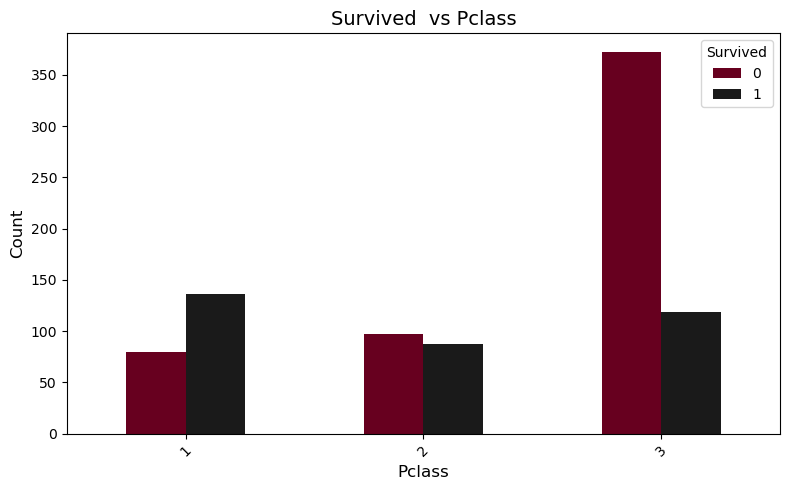

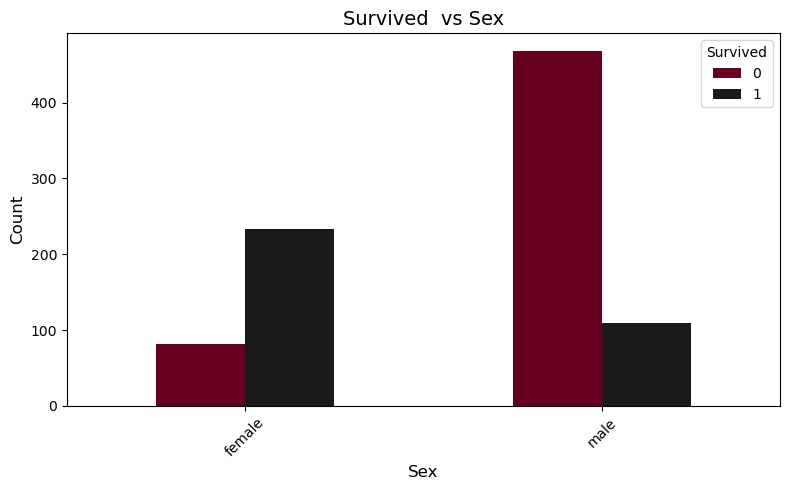

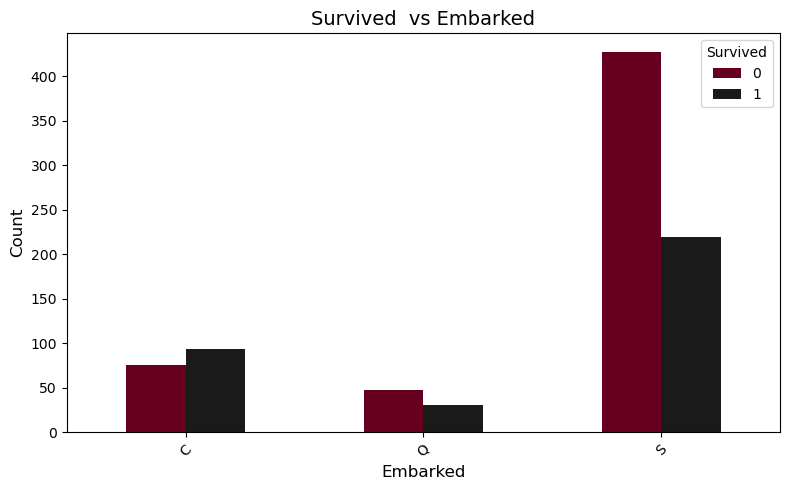

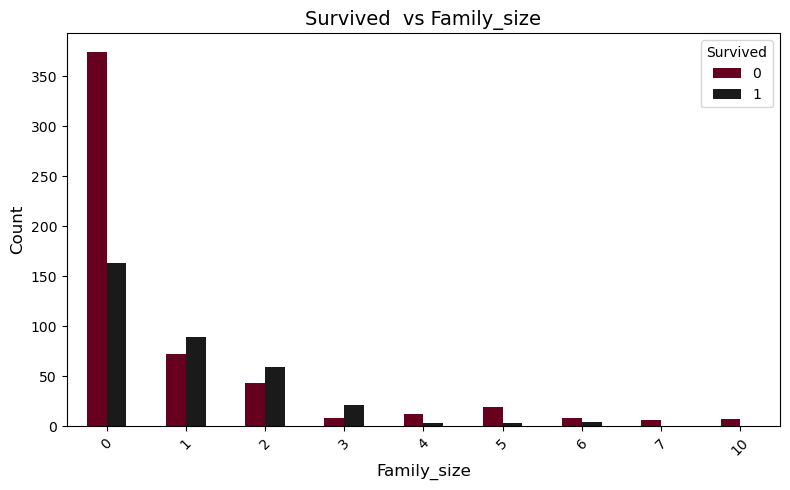

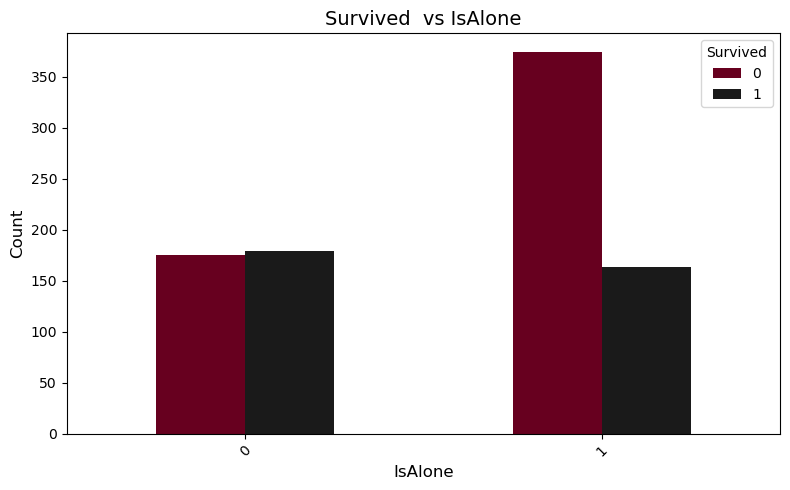

In [29]:
# Plot cross-tabulation for each categorical variable
for i in cat:
    # Create a crosstab
    
    crosstab = pd.crosstab(df[i], df["Survived"])
    
    # Plot the crosstab as a bar chart
    crosstab.plot(kind="bar", stacked=False, figsize=(8, 5), colormap="RdGy")
    
    # Add titles and labels
    plt.title(f"Survived  vs {i}", fontsize=14)
    plt.xlabel(i, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.legend(title="Survived", fontsize=10)
    plt.xticks(rotation=45)
    
    # Display the plot
    plt.tight_layout()
    plt.show()

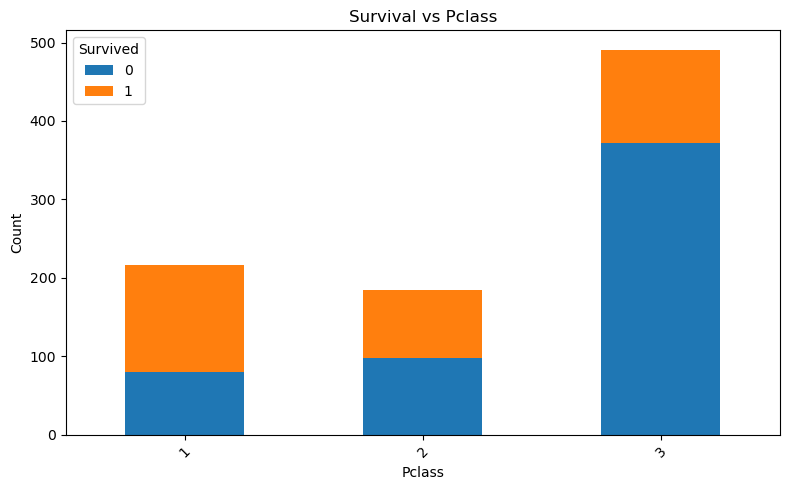

Chi-Square Test for Pclass: chi2 = 102.89, p-value = 0.000


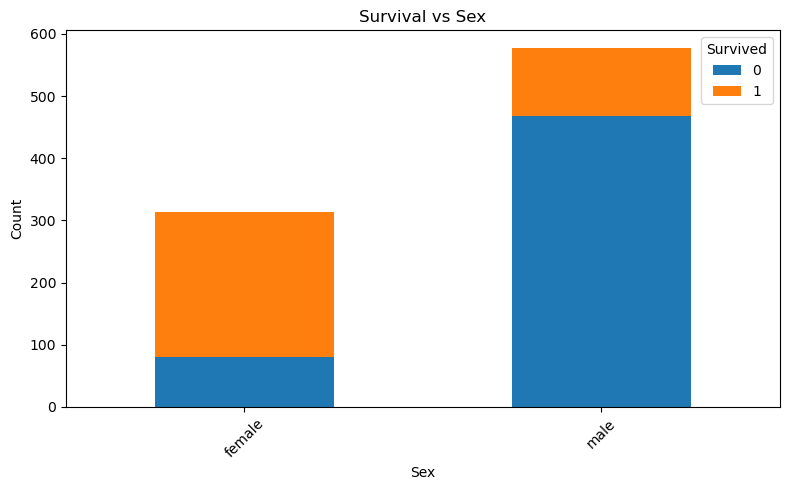

Chi-Square Test for Sex: chi2 = 260.72, p-value = 0.000


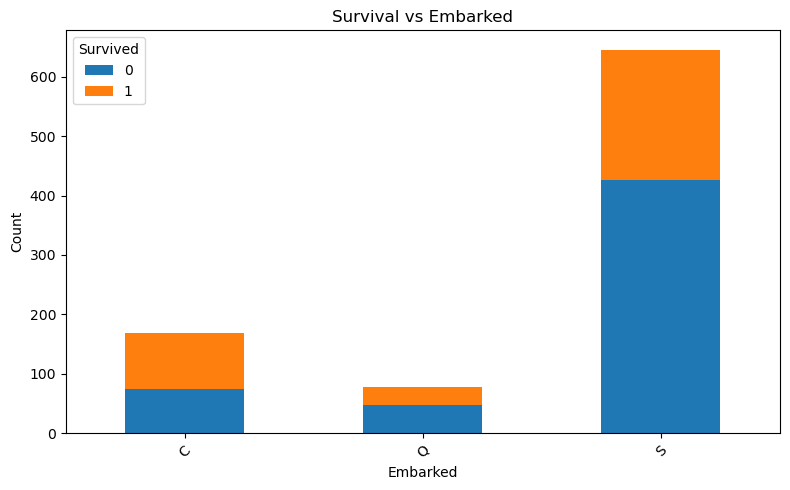

Chi-Square Test for Embarked: chi2 = 25.96, p-value = 0.000


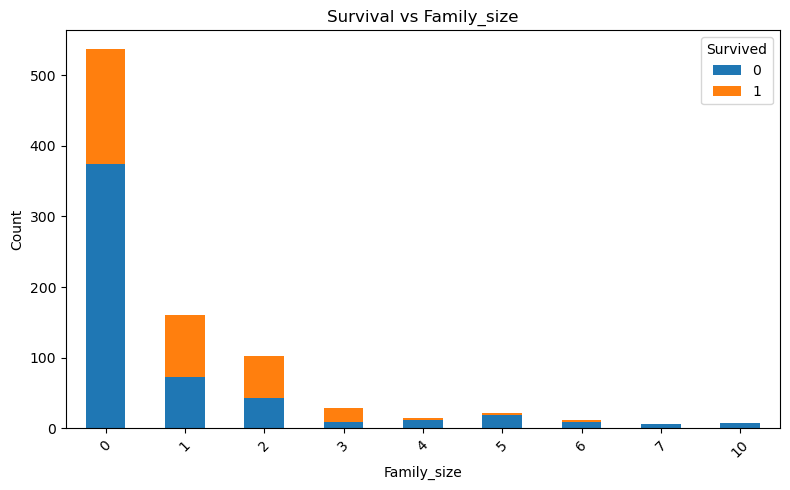

Chi-Square Test for Family_size: chi2 = 80.67, p-value = 0.000


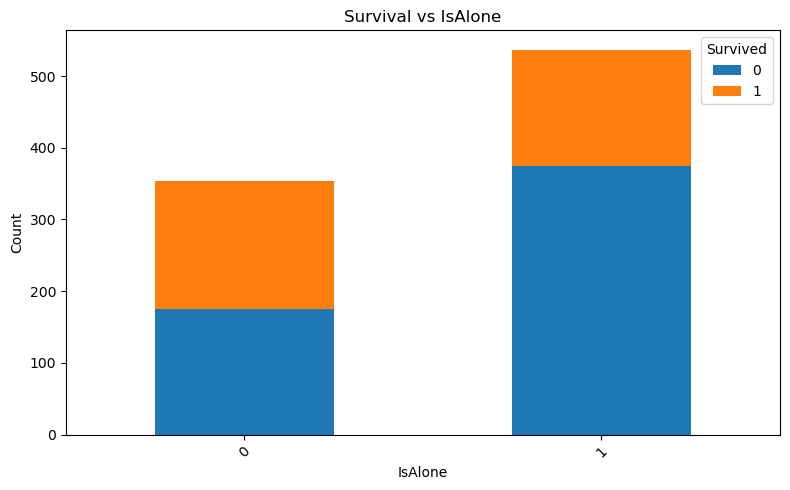

Chi-Square Test for IsAlone: chi2 = 36.00, p-value = 0.000


In [30]:
from scipy.stats import chi2_contingency

# Stacked bar plot for categorical vs. target
for col in cat:
    
    crosstab = pd.crosstab(df[col], df["Survived"])
    crosstab.plot(kind="bar", stacked=True, figsize=(8, 5))
    plt.title(f"Survival vs {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(title="Survived")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Chi-Square test
    chi2, p, dof, _ = chi2_contingency(crosstab)
    print(f"Chi-Square Test for {col}: chi2 = {chi2:.2f}, p-value = {p:.3f}")


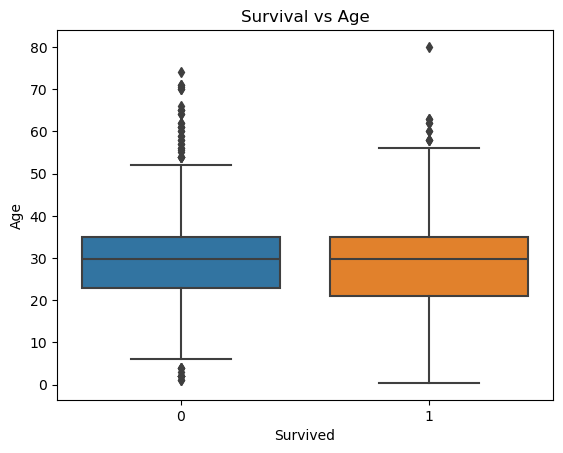

T-test: t-stat = -2.09, p-value = 0.037


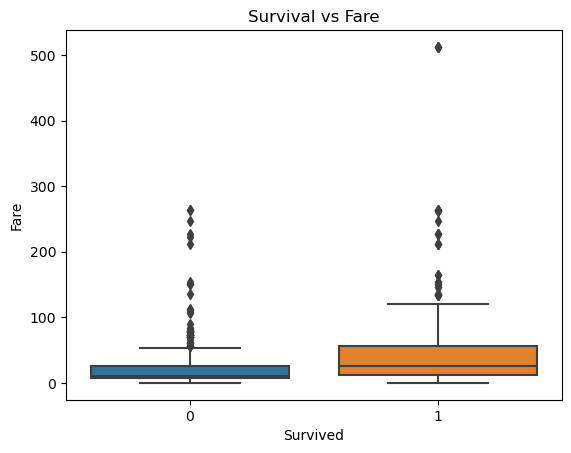

T-test: t-stat = 7.94, p-value = 0.000


In [31]:
from scipy.stats import ttest_ind
for col in cont:
# Box plot for continuous vs. target
    sns.boxplot(data=df, x="Survived", y=col)
    plt.title(f"Survival vs {col}")
    plt.xlabel("Survived")
    plt.ylabel(col)
    plt.show()

    # T-test to check statistical significance
    group1 = df[df["Survived"] == 1][col]
    group0 = df[df["Survived"] == 0][col]
    t_stat, p_value = ttest_ind(group1, group0)
    print(f"T-test: t-stat = {t_stat:.2f}, p-value = {p_value:.3f}")


<Axes: xlabel='Age', ylabel='Count'>

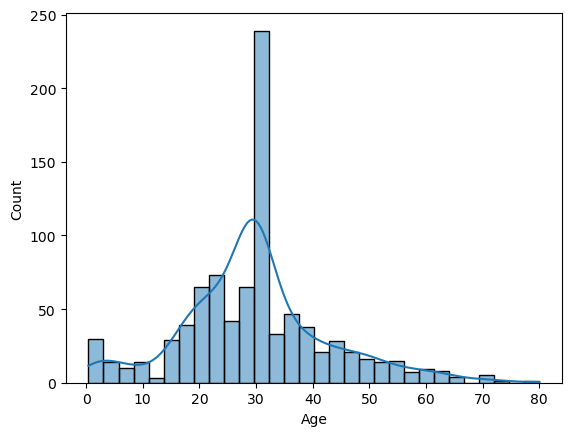

In [32]:
sns.histplot(data=df,x="Age",kde=True)

<Axes: xlabel='Fare', ylabel='Count'>

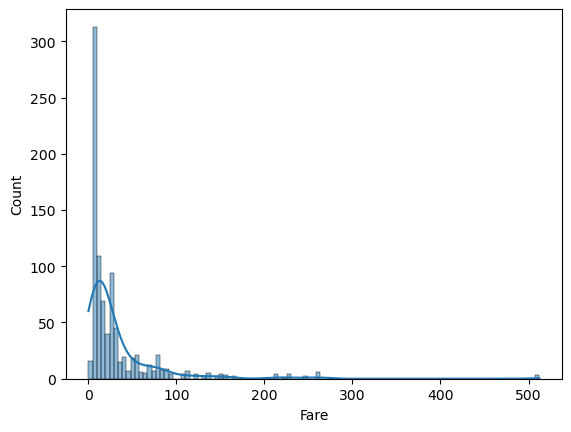

In [33]:
sns.histplot(data=df,x="Fare",kde=True)

In [34]:
df["Sex"]=df["Sex"].map({"male":1,"female":0})

In [35]:
for i in cont:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    print(f"Lower Bound {i} {lower_bound}")
    upper_bound = q3 + 1.5 * iqr
    print(f"upper bound {i} {upper_bound}")
    outliers = df[(df[i] < lower_bound) | (df[i] > upper_bound)]
outliers

Lower Bound Age 2.5
upper bound Age 54.5
Lower Bound Fare -26.724
upper bound Fare 65.6344


,Survived,Pclass,Sex,Age,Fare,Embarked,Family_size,IsAlone
1,1,1,0,38.000000,71.2833,C,1,0
27,0,1,1,19.000000,263.0000,S,5,0
31,1,1,0,29.699118,146.5208,C,1,0
34,0,1,1,28.000000,82.1708,C,1,0
52,1,1,0,49.000000,76.7292,C,1,0
...,...,...,...,...,...,...,...,...
846,0,3,1,29.699118,69.5500,S,10,0
849,1,1,0,29.699118,89.1042,C,1,0
856,1,1,0,45.000000,164.8667,S,2,0
863,0,3,0,29.699118,69.5500,S,10,0


In [36]:
df["Fare"]=df["Fare"].clip(lower=7.910400)
df["Age"]=df["Age"].clip(lower=2.5)

In [37]:
for i in cont:
    s=df[i].skew()
    print("skewness",i ,s)

skewness Age 0.4679292898955702
skewness Fare 4.812639752180308


In [38]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 80], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
df['FareGroup'] = pd.qcut(df['Fare'], 4, labels=['Low', 'Mid', 'High', 'Very High'])

In [39]:
df["Fare"]=np.log(df["Fare"])+1

In [40]:
df["Fare"].skew()

0.9603104511363366

In [41]:
df

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_size,IsAlone,AgeGroup,FareGroup
0,0,3,1,22.000000,3.068178,S,1,0,Young Adult,Low
1,1,1,0,38.000000,5.266662,C,1,0,Adult,Very High
2,1,3,0,26.000000,3.070022,S,0,1,Young Adult,Mid
3,1,1,0,35.000000,4.972177,S,1,0,Young Adult,Very High
4,0,3,1,35.000000,3.085672,S,0,1,Young Adult,Mid
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,3.564949,S,0,1,Young Adult,Mid
887,1,1,0,19.000000,4.401197,S,0,1,Young Adult,High
888,0,3,0,29.699118,4.154870,S,3,0,Young Adult,High
889,1,1,1,26.000000,4.401197,C,0,1,Young Adult,High


In [42]:
scaling=["Family_size",'Age','Fare']
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sc=StandardScaler()
df[scaling] = sc.fit_transform(df[scaling])

continuous=[ 'Age','Fare']
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mn=MinMaxScaler()
df[continuous]=mn.fit_transform(df[continuous])

In [43]:
#df['AgeGroup'].replace({'Child':0, 'Teen':1, 'Young Adult':2, 'Adult':3, 'Senior':4},inplace=True)
#df['FareGroup'].replace({'Low':0, 'Mid':1, 'High':2, 'Very High':3},inplace=True)

In [44]:
df

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_size,IsAlone,AgeGroup,FareGroup
0,0,3,1,-0.597982,-0.944918,S,0.059160,0,Young Adult,Low
1,1,1,0,0.639699,1.436942,C,0.059160,0,Adult,Very High
2,1,3,0,-0.288562,-0.942920,S,-0.560975,1,Young Adult,Mid
3,1,1,0,0.407634,1.117894,S,0.059160,0,Young Adult,Very High
4,0,3,1,0.407634,-0.925965,S,-0.560975,1,Young Adult,Mid
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,-0.211207,-0.406711,S,-0.560975,1,Young Adult,Mid
887,1,1,0,-0.830047,0.499289,S,-0.560975,1,Young Adult,High
888,0,3,0,-0.002416,0.232416,S,1.299429,0,Young Adult,High
889,1,1,1,-0.288562,0.499289,C,-0.560975,1,Young Adult,High


In [45]:
df.drop(columns=["AgeGroup","FareGroup"],inplace=True)

In [46]:
df1=pd.get_dummies(df,dtype="int",drop_first=True)
df1

,Survived,Pclass,Sex,Age,Fare,Family_size,IsAlone,Embarked_Q,Embarked_S
0,0,3,1,-0.597982,-0.944918,0.059160,0,0,1
1,1,1,0,0.639699,1.436942,0.059160,0,0,0
2,1,3,0,-0.288562,-0.942920,-0.560975,1,0,1
3,1,1,0,0.407634,1.117894,0.059160,0,0,1
4,0,3,1,0.407634,-0.925965,-0.560975,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,-0.211207,-0.406711,-0.560975,1,0,1
887,1,1,0,-0.830047,0.499289,-0.560975,1,0,1
888,0,3,0,-0.002416,0.232416,1.299429,0,0,1
889,1,1,1,-0.288562,0.499289,-0.560975,1,0,0


In [47]:
df1.to_csv("Clean_train.csv",index=False)